# Q3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from csv import reader

In [78]:
# making the linear model class

class linear_regression:
#In this case we initialise the function based on various parameters,
#and these include the type of regularisation applied, the number of data points, the learning rate(lr), the maximum number of iterations e can tolerate.
#the regularisation parameter lamda.



#We initialise this model as follows: regularisation is set is to the default case of none.
#The regularisation parameter is set to a reasonable value of 0.2
# The learning rate lr is set to 0.05
#The batch size is set to be 1
#maximum iterations can be anything, set to 10-100 while creation of the model.


    def __init__(self, regu='None', lr=0.05, bs=1, m_iter=10, reg_para1=0.1, reg_para2=0.1):
        self.lr=lr
        self.bs=bs
        self.m_iter=m_iter
        self.reg_para1=reg_para1*(regu!='None')
        self.reg_para2=reg_para2*(regu!='None')
        self.regu=regu
        
    def Pred(self,Xdj):
        w_f=self.w.astype(np.float64)
        #x_com=np.hstack((np.ones((Xd.shape[0], 1)), Xd))
        return np.dot(self.w, Xdj)
        
        
    def train(self, Xd, Yd):
        self.x=Xd
        self.y=Yd

        #defining the rows and columns 
        self.rowx = self.x.shape[0]
        self.colx = self.x.shape[1]
        self.rowy = self.y.shape[0]

        self.w=[0]*self.colx
        self.w=np.array(self.w)

        for i in range(self.m_iter):
          #batch counter is set to 0 after passing of each batch.
          batch_counter=0
          #the gradient vector for the sequential learning should have same dimensions as w.
          nabla=[0]*self.colx
          #iterate over all the data points in batches:
          for j in range(self.rowx):
            batch_counter=(batch_counter+1)%self.bs
            diff=(self.y[j]-self.Pred(self.x[j])) 
            nabla+=diff*self.x[j]
            #start new normalisation after each batch.
            if batch_counter==0:
              #update the weight matrix according to the regularisation.
                if(self.regu=="L2" or self.regu=="None"):
                    reg_para=self.reg_para2
                    b = self.w[0]
                    self.w = (self.w)*(1-self.lr*reg_para) + (nabla * self.lr)/self.bs
                    #self.w[0] = b+(nabla[0]*self.lr)/self.bs
                if(self.regu=="L1"):
                    reg_para=self.reg_para1
                    b = self.w[0]
                    self.w = (self.w)-self.lr*reg_para*np.sign(self.w) + (nabla * self.lr)/self.bs
                    #self.w[0] = b+(nabla[0]*self.lr)/self.bs
                if(self.regu=="L1+L2"):
                    b = self.w[0]
                    self.w = (self.w)*(1-self.lr*self.reg_para2)-self.lr*self.reg_para1*np.sign(self.w) + (nabla * self.lr)/self.bs
                    #self.w[0] = b+(nabla[0]*self.lr)/self.bs 
                nabla=[0]*self.colx
            self.nabla=nabla



    def normal_equation(self, Xd, Yd):
        X=self.processing_function(Xd)
        self.x=X
        self.y=Yd

        #defining the rows and columns 
        self.rowx = self.x.shape[0]
        self.colx = self.x.shape[1]
        self.rowy = self.y.shape[0]


        x_t=np.transpose(self.x)
        y_t=np.transpose(self.y)
        x_t=x_t.astype(np.float64)
        self.x=self.x.astype(np.float64)
        mul=x_t @ self.x
        mul_inv= np.linalg.inv(mul)
        mul_pinv= mul_inv @ x_t
        y_t=y_t.astype(np.float64)
        w_ML=mul_pinv @ y_t
        T_pred= self.x @ w_ML

        self.w=w_ML

    def error(self, Xd, Yd):
        self.x=Xd
        err_mse=0
        err_mae=0
        row=Xd.shape[0]
        for i in range(row):
            err_mse+= (Yd[i] - self.Pred(self.x[i]))**2
            err_mae+= np.abs((Yd[i] - self.Pred(self.x[i])))
        self.err_mse = err_mse/row
        self.err_mae= err_mae/row
        

bias and variance calculation
bias here is the same as mean sqaured error when calculated on the training data set. 
Variance here will be the same as the mean squared error calculated on the testing data set.

## Methodology:

First we take the data and we raise it to the power of a desired polynomial to carry out a polynomial regression. So, let us say we have 3 features in the feature space. $x_1, x_2, x_3$, now, we carry out a 3rd degree polynomial regression. This gives us the desired form of the training function to be

$f(x_1, x_2, x_3)= x_1^3 + x_2^3 +x_3^3 +x_1^2x_2 + x_1^2x_3 +  x_1x_2^2 + x_2^2x_3 + x_1x_3^2 +x_2x_3^2 +x_1x_2x_3 + \text{square terms, linear terms}$

So, each of the term that we see here, will have a weight assigned to it.

So, it basically means we have now many paramters, instead of 3. After fitting the curve we have to calcuate the bias variance curve.


## p1
For p1-A1, we have only 2 features. So, given the data of $x_1$ and $x_2$, we can easily construct another table where the rows will be the terms of the poynomial expansion terms of $x_1,x_2$. For example: for degree 3 we have: $x_1^3, x_1^2x_2, x_1x_2^2, x_2^3, x_1^2, x_2^2, x_1x_2, x_1, x_2, 1$. For a polynomial of degree d we would have (d+1)+(d)+...+1=$\frac{(d+2)(d+1)}{2}$ parameters.

In [3]:
def read_csv(upload):
    data = []
    file = open(upload,'r')
    r = reader(file)
    for row in r:
        data.append(row)

    return data


In [4]:
#Extracting the data for training set
upload_tr = "p1_train.csv"
data_tr = read_csv(upload_tr)
data_tr=np.array(data_tr).astype(np.float64)
#normalise to get good result in gradient descent

x_tr=data_tr[:,:-1]/20
y_tr=data_tr[:,-1]/20

'''row=x_tr.shape[0]
p=[]
for j in range(row):
    if(np.abs(x_tr[j][0])>1 and np.abs(x_tr[j][1])>1):
        p.append(1)
    else:
        p.append(0)
p=np.array(p)
x_tr=x_tr[p==1]'''


#x_tr=x_tr/20 + 2
#y_tr=y_tr/60 + 2

'row=x_tr.shape[0]\np=[]\nfor j in range(row):\n    if(np.abs(x_tr[j][0])>1 and np.abs(x_tr[j][1])>1):\n        p.append(1)\n    else:\n        p.append(0)\np=np.array(p)\nx_tr=x_tr[p==1]'

In [5]:
#Extracting the data for testing set
upload_tst = "p1_test.csv"
data_tst = read_csv(upload_tst)
data_tst=np.array(data_tst).astype(np.float64)
#normalise to get good result in gradient descent
x_tst=data_tst[:,:-1]/20
y_tst=data_tst[:,1]/20


'''row2=x_tst.shape[0]
p2=[]
for j in range(row2):
    if(np.abs(x_tst[j][0])>1 and np.abs(x_tst[j][1])>1):
        p2.append(1)
    else:
        p2.append(0)
p2=np.array(p2)
x_tst=x_tst[p2==1]'''


#x_tst=x_tst/20 + 2
#y_tst=y_tst/60 + 2

'row2=x_tst.shape[0]\np2=[]\nfor j in range(row2):\n    if(np.abs(x_tst[j][0])>1 and np.abs(x_tst[j][1])>1):\n        p2.append(1)\n    else:\n        p2.append(0)\np2=np.array(p2)\nx_tst=x_tst[p2==1]'

### Overparametrised Model in Polynomial Basis

In [6]:
def poly_table(x_data, d):
    row=x_data.shape[0]
    col=int((d*(d-1))/2)
    table=np.ones((row, col))
    count=0
    x1=x_data[:, 0]
    x2=x_data[:, 1]
    for i in range(d):
        for j in range(i):
            table[:, count]=(x1**j)*(x2**(i-j))
            count+=1
    return table

#### Degree 2

In [190]:
d=2
            
X_p_tr=poly_table(x_tr,d)
Y_p_tr=y_tr

X_p_tst=poly_table(x_tst,d)
Y_p_tst=y_tst

In [191]:
model=linear_regression()
model.train(X_p_tr, Y_p_tr)

In [192]:
model.error(X_p_tr, Y_p_tr)
bias=model.err_mse

model.error(X_p_tst, Y_p_tst)
variance=model.err_mse

In [193]:
print(bias)
print(variance)

1.4082631604719493
1.778644165282867


#### Degree 3

In [194]:
d=3
            
X_p_tr=poly_table(x_tr,d)
Y_p_tr=y_tr

X_p_tst=poly_table(x_tst,d)
Y_p_tst=y_tst

In [195]:
model=linear_regression()
model.train(X_p_tr, Y_p_tr)

In [196]:
model.error(X_p_tr, Y_p_tr)
bias=model.err_mse

model.error(X_p_tst, Y_p_tst)
variance=model.err_mse

In [197]:
print(bias)
print(variance)

1.41472516142949
1.7854348939227949


#### degree 4

In [198]:
d=4
            
X_p_tr=poly_table(x_tr,d)
Y_p_tr=y_tr

X_p_tst=poly_table(x_tst,d)
Y_p_tst=y_tst

In [199]:
model=linear_regression()
model.train(X_p_tr, Y_p_tr)

In [200]:
model.error(X_p_tr, Y_p_tr)
bias=model.err_mse

model.error(X_p_tst, Y_p_tst)
variance=model.err_mse

In [201]:
print(bias)
print(variance)

0.6227146768643841
1.9523161352978546


### Bias Variance Curve

In [202]:
model=linear_regression()
Bias=[]
Variance=[]
for d in range(2,20):
    X_p_tr=poly_table(x_tr,d)
    Y_p_tr=y_tr
    X_p_tst=poly_table(x_tst,d)
    Y_p_tst=y_tst
    
    model.train(X_p_tr, Y_p_tr)
    
    model.error(X_p_tr, Y_p_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_p_tst, Y_p_tst)
    var=model.err_mse
    Variance.append(var)
    
    
    

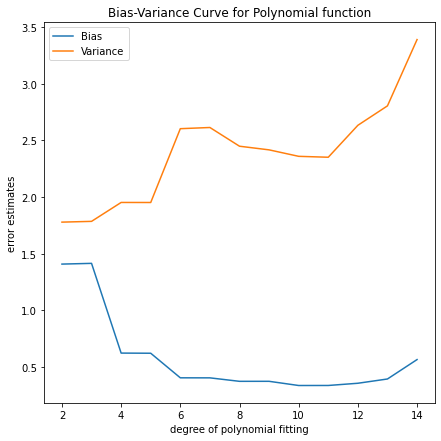

In [203]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:13],Bias[:13], label="Bias")
plt.plot(d[:13], Variance[:13], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Polynomial function")
plt.legend()

Comments: the Bias-Variance Curve resembles the standard curve but bias and variance both become very large for degrees greater than 13, this is probably due to the normalisation that we have applied here

## A different over-parametrised model, output depends on polynomial combination of Gaussian Basis functions

In [28]:
def gauss_table(x_data, d, s):
    x1=x_data[:, 0]*20
    x2=x_data[:, 1]*20
    row=x_data.shape[0]
    col=int((d*(d-1))/2)
    table=np.ones((row, col))
    count=0
    
    for i in range(d):
        for j in range(i):
            table[:, count]=(x1**j)*(x2**(i-j))
            mean=np.mean(table[:,count])
            sd=np.var(table[:,count])
            table[:,count]=np.exp(-((table[:,count]-mean)**2)/(2*sd**2))
            count+=1
    return table

Example Case, d=2

In [25]:
d=2
s=1
            
X_p_tr=gauss_table(x_tr,d,s)
Y_p_tr=y_tr

X_p_tst=gauss_table(x_tst,d,s)
Y_p_tst=y_tst

In [9]:
model=linear_regression()
model.train(X_p_tr, Y_p_tr)

model.error(X_p_tr, Y_p_tr)
bias=model.err_mse

model.error(X_p_tst, Y_p_tst)
variance=model.err_mse

In [10]:
print(bias)
print(variance)

1.6812551852023978
0.33218707847583906


## Bias-Variance Curve

In [29]:
model=linear_regression()
Bias=[]
Variance=[]
s=1
for d in range(2,10):
    X_g_tr=gauss_table(x_tr,d,s)
    Y_g_tr=y_tr
    X_g_tst=gauss_table(x_tst,d,s)
    Y_g_tst=y_tst
    
    model.train(X_g_tr, Y_g_tr)
    
    model.error(X_g_tr, Y_g_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_g_tst, Y_g_tst)
    var=model.err_mse
    Variance.append(var)
    
    

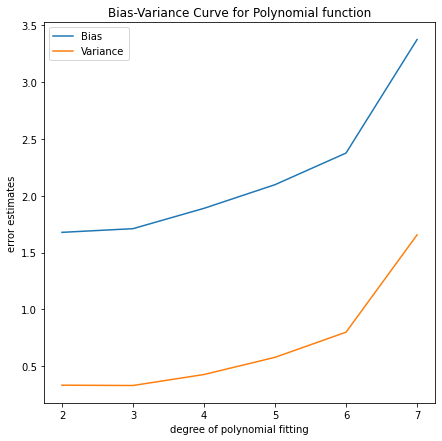

In [30]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:6],Bias[:6], label="Bias")
plt.plot(d[:6], Variance[:6], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Gaussian Basis")
plt.legend()

Comments: the bias never decreases and the variance also increases in a similar rate

## A model where output depends on the sigmoid functions

In [44]:
def sig_table(x_data, d, s):
    x1=x_data[:, 0]
    mean1=np.mean(x1)
    var1=np.var(x1)
    x1=1/(1+np.exp(-np.abs(x1-mean1)/20*var1))
    x2=x_data[:, 1]
    mean2=np.mean(x2)
    var2=np.var(x2)
    x2=1/(1+np.exp(-np.abs(x2-mean2)/20*var2))
    row=x_data.shape[0]
    col=int((d*(d-1))/2)
    table=np.ones((row, col))
    count=0
    
    for i in range(d):
        for j in range(i):
            table[:, count]=(x1**j)*(x2**(i-j))
            #mean=np.mean(table[:,count])
            #sd=np.var(table[:,count])
            #table[:,count]=1/(1+ np.exp(-np.abs(table[:,count]-mean)/sd))
            count+=1
    return table

## Bias-Variance Curve

In [55]:
model=linear_regression()
Bias=[]
Variance=[]
s=1
for d in range(2,30):
    X_g_tr=sig_table(x_tr,d,s)
    Y_g_tr=y_tr
    X_g_tst=sig_table(x_tst,d,s)
    Y_g_tst=y_tst
    
    model.train(X_g_tr, Y_g_tr)
    
    model.error(X_g_tr, Y_g_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_g_tst, Y_g_tst)
    var=model.err_mse
    Variance.append(var)
    

(1.68, 1.7)

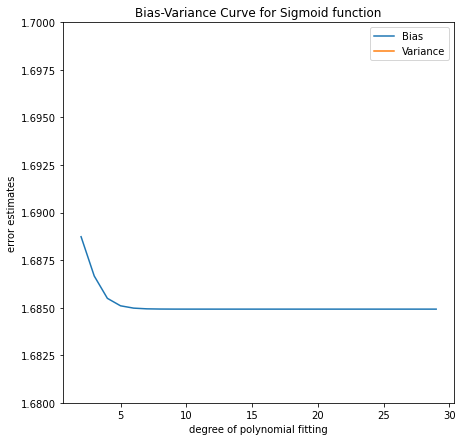

In [66]:
d=np.linspace(2,29,28)
plt.figure(figsize=(7,7))
plt.plot(d[:28],Bias[:28], label="Bias")
plt.plot(d[:28], Variance[:28], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Sigmoid function")
plt.legend()
plt.ylim(1.68,1.7)

(0.329, 0.332)

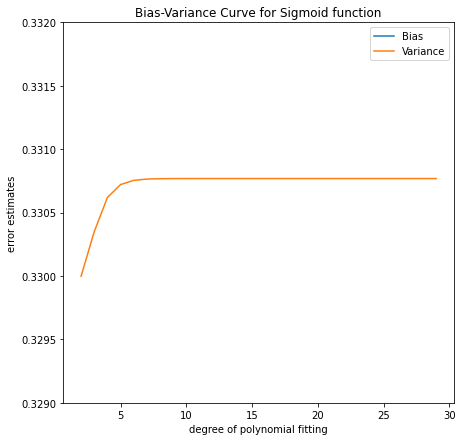

In [68]:
d=np.linspace(2,29,28)
plt.figure(figsize=(7,7))
plt.plot(d[:28],Bias[:28], label="Bias")
plt.plot(d[:28], Variance[:28], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Sigmoid function")
plt.legend()
plt.ylim(0.329,0.332)

Although the variation is not very visible, individually we cansee bias decreases and variance increases, but saturates.

## Applying Normalisation

### Polynomial Model

##### L2

In [72]:
model=linear_regression(regu="L2")
Bias=[]
Variance=[]
for d in range(2,20):
    X_p_tr=poly_table(x_tr,d)
    Y_p_tr=y_tr
    X_p_tst=poly_table(x_tst,d)
    Y_p_tst=y_tst
    
    model.train(X_p_tr, Y_p_tr)
    
    model.error(X_p_tr, Y_p_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_p_tst, Y_p_tst)
    var=model.err_mse
    Variance.append(var)
    

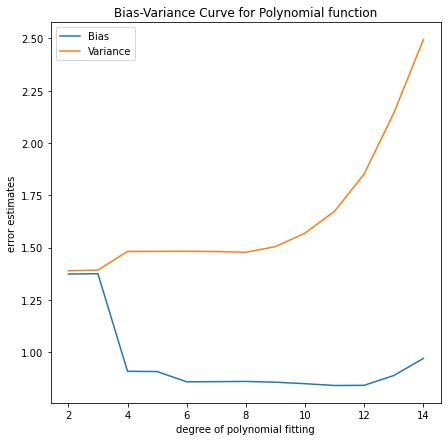

In [73]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:13],Bias[:13], label="Bias")
plt.plot(d[:13], Variance[:13], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Polynomial function")
plt.legend()

##### L1

In [79]:
model=linear_regression(regu="L1")
Bias=[]
Variance=[]
for d in range(2,20):
    X_p_tr=poly_table(x_tr,d)
    Y_p_tr=y_tr
    X_p_tst=poly_table(x_tst,d)
    Y_p_tst=y_tst
    
    model.train(X_p_tr, Y_p_tr)
    
    model.error(X_p_tr, Y_p_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_p_tst, Y_p_tst)
    var=model.err_mse
    Variance.append(var)
    

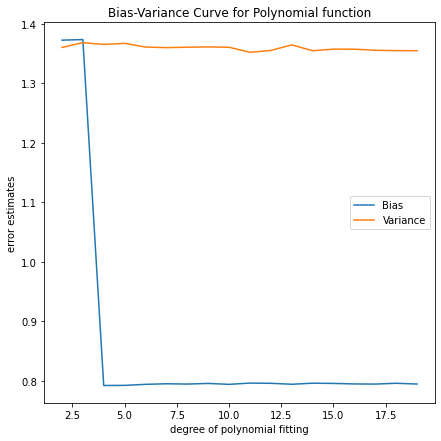

In [81]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:18],Bias[:18], label="Bias")
plt.plot(d[:18], Variance[:18], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Polynomial function")
plt.legend()

##### L1+L2

In [82]:
model=linear_regression(regu="L1+L2")
Bias=[]
Variance=[]
for d in range(2,20):
    X_p_tr=poly_table(x_tr,d)
    Y_p_tr=y_tr
    X_p_tst=poly_table(x_tst,d)
    Y_p_tst=y_tst
    
    model.train(X_p_tr, Y_p_tr)
    
    model.error(X_p_tr, Y_p_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_p_tst, Y_p_tst)
    var=model.err_mse
    Variance.append(var)

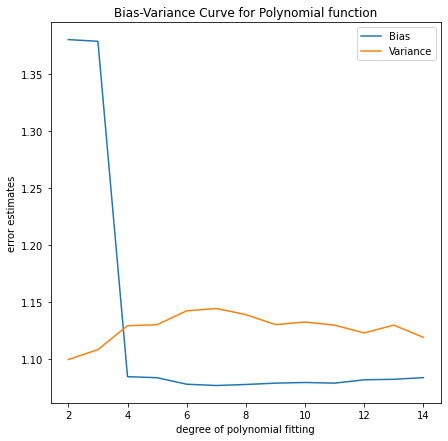

In [83]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:13],Bias[:13], label="Bias")
plt.plot(d[:13], Variance[:13], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Polynomial function")
plt.legend()

## Gaussian Basis

##### L2

In [84]:
model=linear_regression(regu="L2")
Bias=[]
Variance=[]
s=1
for d in range(2,10):
    X_g_tr=gauss_table(x_tr,d,s)
    Y_g_tr=y_tr
    X_g_tst=gauss_table(x_tst,d,s)
    Y_g_tst=y_tst
    
    model.train(X_g_tr, Y_g_tr)
    
    model.error(X_g_tr, Y_g_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_g_tst, Y_g_tst)
    var=model.err_mse
    Variance.append(var)

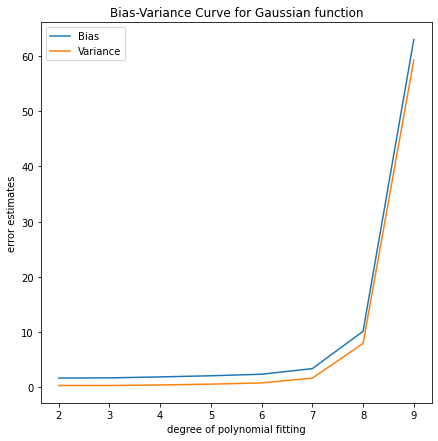

In [87]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:8],Bias[:8], label="Bias")
plt.plot(d[:8], Variance[:8], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Gaussian function")
plt.legend()

##### L1

In [88]:
model=linear_regression(regu="L1")
Bias=[]
Variance=[]
s=1
for d in range(2,10):
    X_g_tr=gauss_table(x_tr,d,s)
    Y_g_tr=y_tr
    X_g_tst=gauss_table(x_tst,d,s)
    Y_g_tst=y_tst
    
    model.train(X_g_tr, Y_g_tr)
    
    model.error(X_g_tr, Y_g_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_g_tst, Y_g_tst)
    var=model.err_mse
    Variance.append(var)

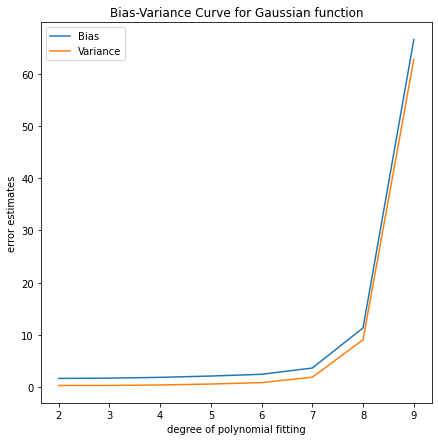

In [89]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:8],Bias[:8], label="Bias")
plt.plot(d[:8], Variance[:8], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Gaussian function")
plt.legend()

##### L1+L2

In [90]:
model=linear_regression(regu="L1+L2")
Bias=[]
Variance=[]
s=1
for d in range(2,10):
    X_g_tr=gauss_table(x_tr,d,s)
    Y_g_tr=y_tr
    X_g_tst=gauss_table(x_tst,d,s)
    Y_g_tst=y_tst
    
    model.train(X_g_tr, Y_g_tr)
    
    model.error(X_g_tr, Y_g_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_g_tst, Y_g_tst)
    var=model.err_mse
    Variance.append(var)

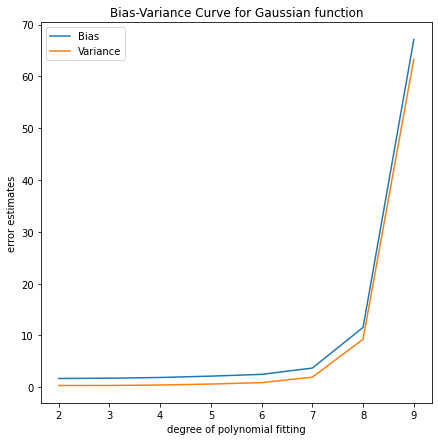

In [91]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:8],Bias[:8], label="Bias")
plt.plot(d[:8], Variance[:8], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for Gaussian function")
plt.legend()

## Sigmoid Basis Function

##### L2

In [92]:
model=linear_regression(regu="L2")
Bias=[]
Variance=[]
s=1
for d in range(2,20):
    X_g_tr=sig_table(x_tr,d,s)
    Y_g_tr=y_tr
    X_g_tst=sig_table(x_tst,d,s)
    Y_g_tst=y_tst
    
    model.train(X_g_tr, Y_g_tr)
    
    model.error(X_g_tr, Y_g_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_g_tst, Y_g_tst)
    var=model.err_mse
    Variance.append(var)

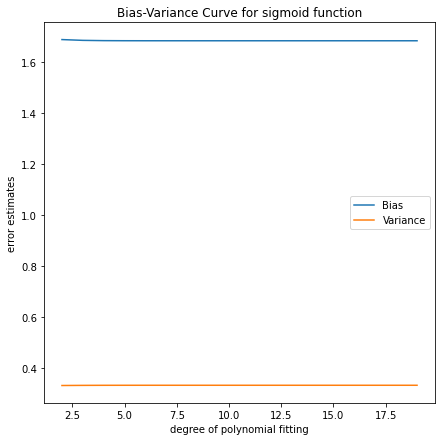

In [93]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:18],Bias[:18], label="Bias")
plt.plot(d[:18], Variance[:18], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for sigmoid function")
plt.legend()

##### L1

In [94]:
model=linear_regression(regu="L1")
Bias=[]
Variance=[]
s=1
for d in range(2,30):
    X_g_tr=sig_table(x_tr,d,s)
    Y_g_tr=y_tr
    X_g_tst=sig_table(x_tst,d,s)
    Y_g_tst=y_tst
    
    model.train(X_g_tr, Y_g_tr)
    
    model.error(X_g_tr, Y_g_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_g_tst, Y_g_tst)
    var=model.err_mse
    Variance.append(var)

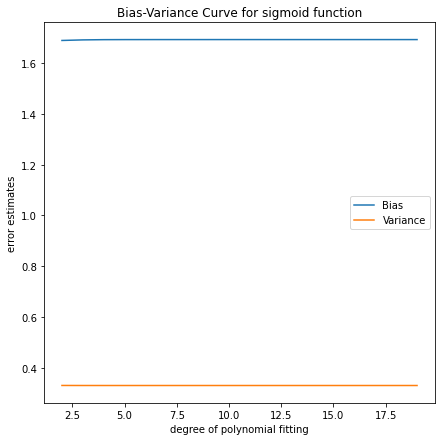

In [95]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:18],Bias[:18], label="Bias")
plt.plot(d[:18], Variance[:18], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for sigmoid function")
plt.legend()

##### L1+L2

In [96]:
model=linear_regression(regu="L1+L2")
Bias=[]
Variance=[]
s=1
for d in range(2,30):
    X_g_tr=sig_table(x_tr,d,s)
    Y_g_tr=y_tr
    X_g_tst=sig_table(x_tst,d,s)
    Y_g_tst=y_tst
    
    model.train(X_g_tr, Y_g_tr)
    
    model.error(X_g_tr, Y_g_tr)
    bias=model.err_mse
    Bias.append(bias)
    
    model.error(X_g_tst, Y_g_tst)
    var=model.err_mse
    Variance.append(var)
    

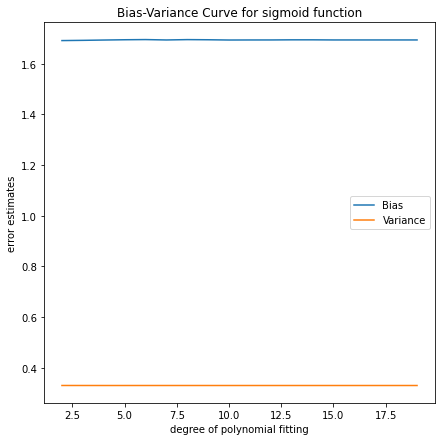

In [97]:
d=np.linspace(2,19,18)
plt.figure(figsize=(7,7))
plt.plot(d[:18],Bias[:18], label="Bias")
plt.plot(d[:18], Variance[:18], label="Variance")
plt.xlabel("degree of polynomial fitting")
plt.ylabel("error estimates")
plt.title("Bias-Variance Curve for sigmoid function")
plt.legend()

#### The models do not work properly for sigmoid and gaussian basis functions. This is because the non linear behaviour of the model and also, in the sigmoid basis function example, the bias does decrease and the variance does increase but the saturation is very close to the starting value and that is why it is not aspparent in the current graphs, if we plot two separate graphs such as in teh un-regularised case, then we might see the trend better.